In [1]:
from pathlib import Path

import os
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import mushroom.data.cosmx as cosmx
import mushroom.utils as utils

In [45]:
# cosmx_dir = '/diskmnt/primary/CosMx/data/HT704B1-S1H3Fp1U14___HT704B1-S1H3Fp1U22'
cosmx_dir = '/diskmnt/primary/CosMx/data/HT704B1-S1H3Fp1U56___HT704B1-S1H3Fp1U47'
save_dir = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/cosmx/HT704B1'
Path(save_dir).mkdir(parents=True, exist_ok=True)

In [46]:
flatfiles_dir = os.path.join(cosmx_dir, 'flatfiles')
morph_dir = '/diskmnt/primary/CosMx/data/HT704B1-S1H3Fp1U56___HT704B1-S1H3Fp1U47/HT704B1_S1H3Fp1slide19/20240620_214004_S2/CellStatsDir/Morphology2D'


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


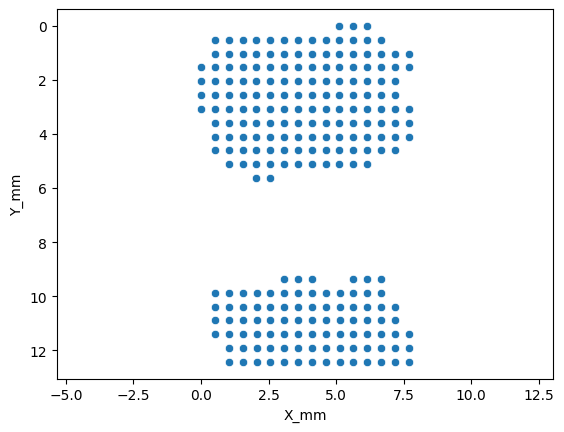

In [47]:
cosmx.display_fovs(cosmx_dir, flatfiles_dir=flatfiles_dir)

In [48]:
scaler = .1
sample_to_bbox = {
    'HT704B1-S1H3Fp1U47': (0, 7, 0, 9), # top, bottom, left, right
    'HT704B1-S1H3Fp1U56': (8, 14, 0, 10),
}

In [49]:
sample_to_adata = cosmx.adata_from_cosmx(
    cosmx_dir, sample_to_bbox=sample_to_bbox, scaler=scaler,
    flatfiles_dir=flatfiles_dir, morphology_dir=morph_dir, version='v2',
)

In [50]:
for sid, adata in sample_to_adata.items():
    adata.write_h5ad(os.path.join(save_dir, f'{sid}.h5ad'))

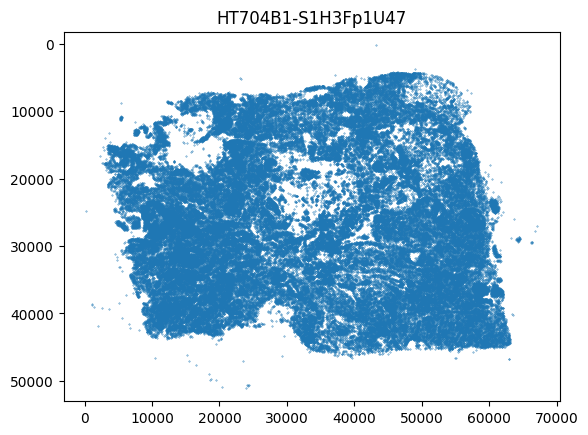

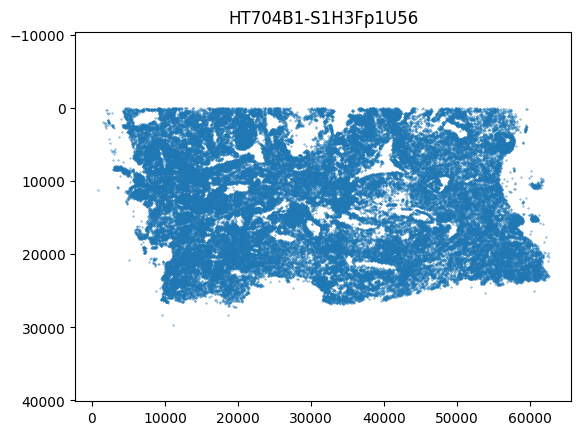

In [51]:
for sid, adata in sample_to_adata.items():
    plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=.1)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(sid)
    plt.show()

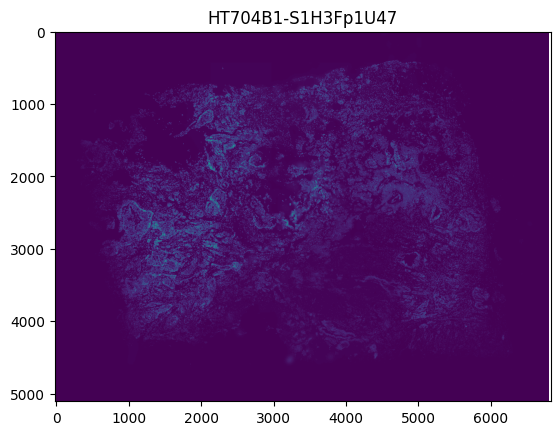

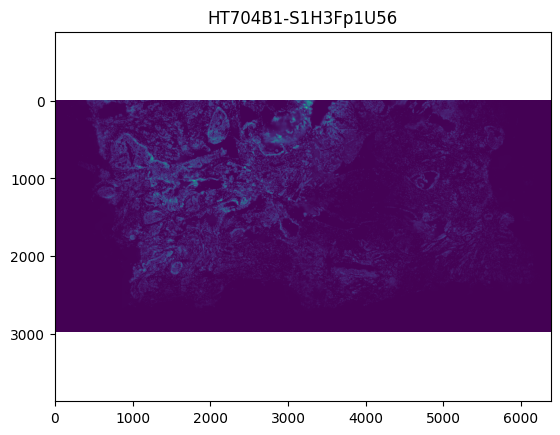

In [52]:
for sid, adata in sample_to_adata.items():
    img = next(iter(adata.uns['spatial'].values()))['images']['hires']
    plt.imshow(img)
    plt.axis('equal')
    plt.title(sid)
    plt.show()

In [53]:
adata.obsm['spatial']

array([[ 9663, 28330],
       [10340, 26524],
       [10390, 26520],
       ...,
       [56029,   142],
       [56380,    56],
       [55467,    35]])